In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pdb
import pandas as pd

# all units SI (meters, kg, etc.)
global distance
distance = 7
global height
height = 2.286
global m
m = 0.141748
global R_l
R_l = 0.0508
global R_u
R_u = 0.03175
global R_b
R_b = 0.0889
global A
A = 0.0248286665
global interval
interval = 0.005
global run
run = True

#not sure if global matters here

In [2]:
def iterate():
    global run
    for w_r in range(30,600): #6380 rpm in rps
        for theta in range(15,75):
            if(run):
                trajectory(w_r, theta*math.pi/180)
    #print("done")
    run = True


In [3]:
def trajectory(w, theta):
    v = (w*R_l + 9/16*w*R_u)/2
    #print(v)
    s = (w*R_l - 9/16*w*R_u)/(2*math.pi*R_b)
    runPath(w,v,s,theta)

In [17]:

def runPath(w,v_i,s,theta_i):
    v_x = v_i*math.cos(theta_i)
    v_y = v_i*math.sin(theta_i)
    theta = theta_i
    x_dist = 0
    y_dist = 0
    through = True
    x = [0]
    y = [0]
    while(through):
        x_dist += v_x*interval
        y_dist += v_y*interval
        x.append(x_dist)
        y.append(y_dist)
        v_n = math.sqrt(v_x*v_x + v_y*v_y)
        theta = angle(v_x,v_y)
 
        magnus = magnusF(s, v_n)
        drag = dragF(v_n)
        
        v_x -= (magnus*math.sin(theta) + drag*math.cos(theta))*interval
        v_y -= (drag*math.sin(theta) + 9.8 - magnus*math.cos(theta))*interval
        if(((x_dist > distance - .01) and (x_dist < distance + .01)) and ((y_dist > height - .01) and (y_dist < height + .01))):
            through = False
            global w_min
            plt.plot(x,y)
            omega_array.append(round(w*60/(2*math.pi),1))
            theta_array.append(round(theta_i*180/math.pi,1))
            print ("w: " + str(w*60/(2*math.pi)) + " a: " + str(theta_i*180/math.pi))
            global run
            run = False
            
        if(y_dist < 0 or y_dist > 3.2):
            through = False
            

In [18]:
def magnusF(s,v):
    return (0.1)*(16/3)*(math.pi*math.pi)*1.225*(R_b**3)*s*v/m
def dragF(v):
    return (0.47)*(1.225/2)*A*(v**2)/m
def angle(x,y):
    return math.atan(y/x)

1 , 2.3
w: 2158.1410283261007 a: 59.99999999999999
2 , 2.3939999999999997
w: 2177.239621497128 a: 58.0
3 , 2.488
w: 2186.788918082642 a: 58.0
4 , 2.582
w: 2205.8875112536693 a: 57.0
5 , 2.6759999999999997
w: 2215.436807839183 a: 57.0
6 , 2.7699999999999996
w: 2234.5354010102105 a: 56.0
7 , 2.864
w: 2244.0846975957243 a: 56.0
8 , 2.9579999999999997
w: 2263.1832907667517 a: 55.0
9 , 3.0519999999999996
w: 2272.7325873522655 a: 55.0
10 , 3.146
w: 2291.831180523293 a: 54.0
11 , 3.2399999999999998
w: 2310.9297736943204 a: 53.0
12 , 3.3339999999999996
w: 2320.479070279834 a: 53.0
13 , 3.428
w: 2339.5776634508616 a: 52.00000000000001
14 , 3.522
w: 2358.676256621889 a: 51.0
15 , 3.6159999999999997
w: 2368.2255532074028 a: 52.00000000000001
16 , 3.71
w: 2387.32414637843 a: 51.0
17 , 3.804
w: 2406.4227395494577 a: 50.0
18 , 3.8979999999999997
w: 2415.9720361349714 a: 50.0
19 , 3.992
w: 2435.070629305999 a: 49.0
20 , 4.086
w: 2454.1692224770263 a: 48.0
21 , 4.18
w: 2463.71851906254 a: 49.0
22 , 4.

KeyboardInterrupt: 

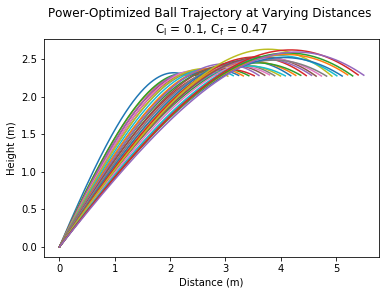

In [19]:
plt.title("Power-Optimized Ball Trajectory at Varying Distances \n$C_l$ = 0.1, $C_f$ = 0.47")
plt.xlabel("Distance (m)")
plt.ylabel("Height (m)")

plt.rcParams.update({'mathtext.default':  'regular' })

trial_array = []
distance_array = []
omega_array = []
theta_array = []
max_trials = 50

for i in range(0,max_trials):
    trial_array.append(i+1)
    distance = 2.3 + ((7-2.3) / max_trials)*i
    distance_array.append(distance)
    print(str(i+1) + " , " + str(distance))
    iterate()
    
plt.savefig("power_optimized" + str(max_trials) + "_trials.png")
plt.show()

In [26]:
def make_bold(val):
    bold = 'bold'
    
    return 'font-weight: %s' % bold

df = pd.DataFrame(data = {'Trial': trial_array, 
                          'Distance': distance_array, 
                          'Angular Velocity': omega_array, 
                          'Angle': theta_array})
df.to_csv("power_optimized" + str(max_trials) + "_trials1.csv")

In [24]:
print(len(trial_array))
print(len(distance_array))
print(len(omega_array))
print(len(theta_array))

35
36
35
35
